In [241]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [242]:
df = pd.read_csv('targetfirm_prediction_dataset_small.csv')

In [243]:
len(df)

225010

# Data PreProcessing ##

In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225010 entries, 0 to 225009
Data columns (total 18 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  225010 non-null  int64  
 1   gvkey       225010 non-null  int64  
 2   fyear       225010 non-null  float64
 3   target      225010 non-null  float64
 4   at          190375 non-null  float64
 5   revt        189333 non-null  float64
 6   ib          189350 non-null  float64
 7   ca          13611 non-null   float64
 8   capx        161826 non-null  float64
 9   ceq         189947 non-null  float64
 10  che         167934 non-null  float64
 11  emp         161151 non-null  float64
 12  invt        171657 non-null  float64
 13  re          184462 non-null  float64
 14  xrd         74723 non-null   float64
 15  dltt        189974 non-null  float64
 16  dv          159952 non-null  float64
 17  sic         225007 non-null  float64
dtypes: float64(16), int64(2)
memory usage: 30.9 

In [245]:
df.isna()

,Unnamed: 0,gvkey,fyear,target,at,revt,ib,ca,capx,ceq,che,emp,invt,re,xrd,dltt,dv,sic
0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False
2,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225005,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True
225006,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True
225007,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,False
225008,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,False


In [246]:
#fill missing vlaues with mean
df = df.fillna(df.mean())

In [247]:
df.target = df.target.astype("int")

In [248]:
df.head()

,Unnamed: 0,gvkey,fyear,target,at,revt,ib,ca,capx,ceq,che,emp,invt,re,xrd,dltt,dv,sic
0,6,1004,2000.0,0,701.854,874.255,18.531,218.263614,13.134,340.212,13.809,2.5,320.590,204.065,106.568218,179.987,9.157,5080.0
1,7,1004,2001.0,0,710.199,638.721,-58.939,218.263614,12.112,310.235,34.522,2.2,286.588,139.603,106.568218,217.699,4.430,5080.0
2,8,1004,2002.0,0,686.621,606.337,-12.410,218.263614,9.930,294.988,29.154,2.1,259.954,124.106,106.568218,164.658,0.797,5080.0
3,9,1004,2003.0,0,709.292,651.958,3.504,218.263614,10.286,301.684,41.010,2.3,247.245,131.884,106.568218,248.666,0.000,5080.0
4,10,1004,2004.0,0,732.230,747.848,18.572,218.263614,13.033,314.744,50.338,2.6,255.477,142.450,106.568218,227.159,0.000,5080.0


In [249]:
df.target.unique()

array([0, 1])

In [250]:
df = df.drop('Unnamed: 0',axis=1)

In [251]:
y = df.target.copy()
X = df.drop(['target'], axis=1)

In [252]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [253]:
model = LogisticRegression(max_iter=10**4)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [254]:
y_pred = pd.Series(model.predict(X_test))
y_test = y_test.reset_index(drop=True)
z = pd.concat([y_test, y_pred], axis=1)
z.columns = ['True', 'Prediction']
z.head(1000)

,True,Prediction
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
995,0,0
996,0,0
997,0,0
998,0,0


Accuracy: 0.9922670103550953
Precision: 0.0
Recall: 0.0
F1: 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


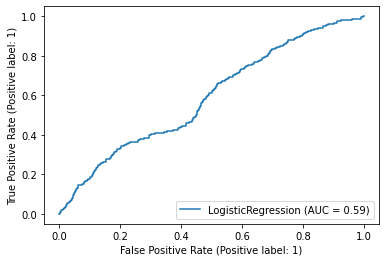

In [255]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1:",metrics.f1_score(y_test, y_pred))
metrics.plot_roc_curve(model,X_test,y_test)

Text(0.5, 15.0, 'Predicted')

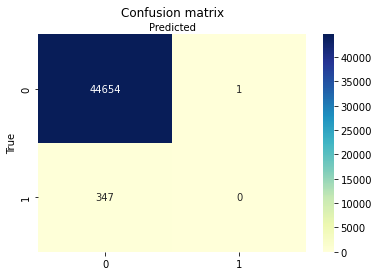

In [256]:
import matplotlib.pyplot as plt
import seaborn as sns
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

labels = [0.0, 1.0]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

In [257]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5)

In [258]:
scores.mean()

0.9916537042798097

# SVM

In [259]:
from sklearn import svm
from sklearn.metrics import plot_confusion_matrix


In [260]:
clf = svm.SVC( )
clf = clf.fit(X_train, y_train)

In [261]:
predictions = clf.predict(X_test)

Accuracy: 0.9922892315897072
Precision: 0.0
Recall: 0.0
F1: 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


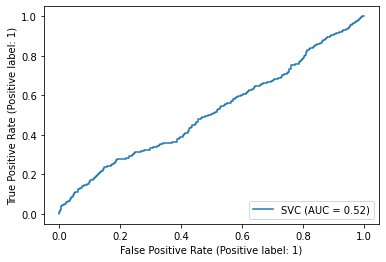

In [262]:
print("Accuracy:", metrics.accuracy_score(y_test, predictions))
print("Precision:", metrics.precision_score(y_test, predictions))
print("Recall:", metrics.recall_score(y_test, predictions))
print("F1:",metrics.f1_score(y_test, predictions))
metrics.plot_roc_curve(clf,X_test,y_test)

Text(0.5, 15.0, 'Predicted')

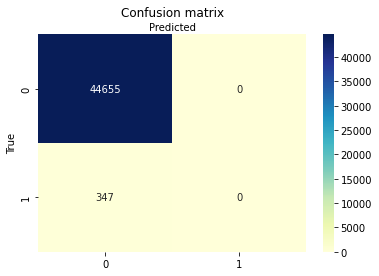

In [263]:
cnf_matrix = metrics.confusion_matrix(y_test, predictions)

labels = [0.0, 1.0]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

# Decision Tree

In [264]:
from sklearn.tree import DecisionTreeClassifier
clf_en = DecisionTreeClassifier(criterion='gini', max_depth=6, random_state=1)
clf_en.fit(X_train, y_train)
y_pred_en = clf_en.predict(X_test)

In [265]:
 metrics.confusion_matrix(y_test, y_pred_en)

array([[44649,     6],
       [  345,     2]])

Accuracy: 0.9922003466512599
Precision: 0.25
Recall: 0.005763688760806916
F1: 0.011267605633802816


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


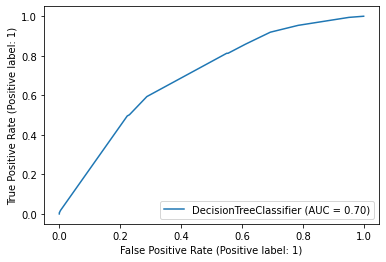

In [266]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_en))
print("Precision:", metrics.precision_score(y_test, y_pred_en))
print("Recall:", metrics.recall_score(y_test, y_pred_en))
print("F1:",metrics.f1_score(y_test, y_pred_en))
metrics.plot_roc_curve(clf_en,X_test,y_test)

In [267]:
from sklearn import tree
text_representation = tree.export_text(clf_en)
print(text_representation)

|--- feature_8 <= 4.69
|   |--- feature_12 <= 1046.50
|   |   |--- feature_3 <= 17.58
|   |   |   |--- feature_4 <= -1470.79
|   |   |   |   |--- feature_15 <= 3823.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_15 >  3823.00
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_4 >  -1470.79
|   |   |   |   |--- feature_13 <= 14.11
|   |   |   |   |   |--- feature_1 <= 2011.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_1 >  2011.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_13 >  14.11
|   |   |   |   |   |--- feature_13 <= 14.12
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_13 >  14.12
|   |   |   |   |   |   |--- class: 0
|   |   |--- feature_3 >  17.58
|   |   |   |--- feature_3 <= 17.59
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  17.59
|   |   |   |   |--- feature_15 <= 7382.50
|   |   |   |   |   |--- feature_3 <= 17.60
|   |   |   |   |   |   |--- class: 0
|   |  

In [268]:
with open("decistion_tree.log", "w") as fout:
    fout.write(text_representation)

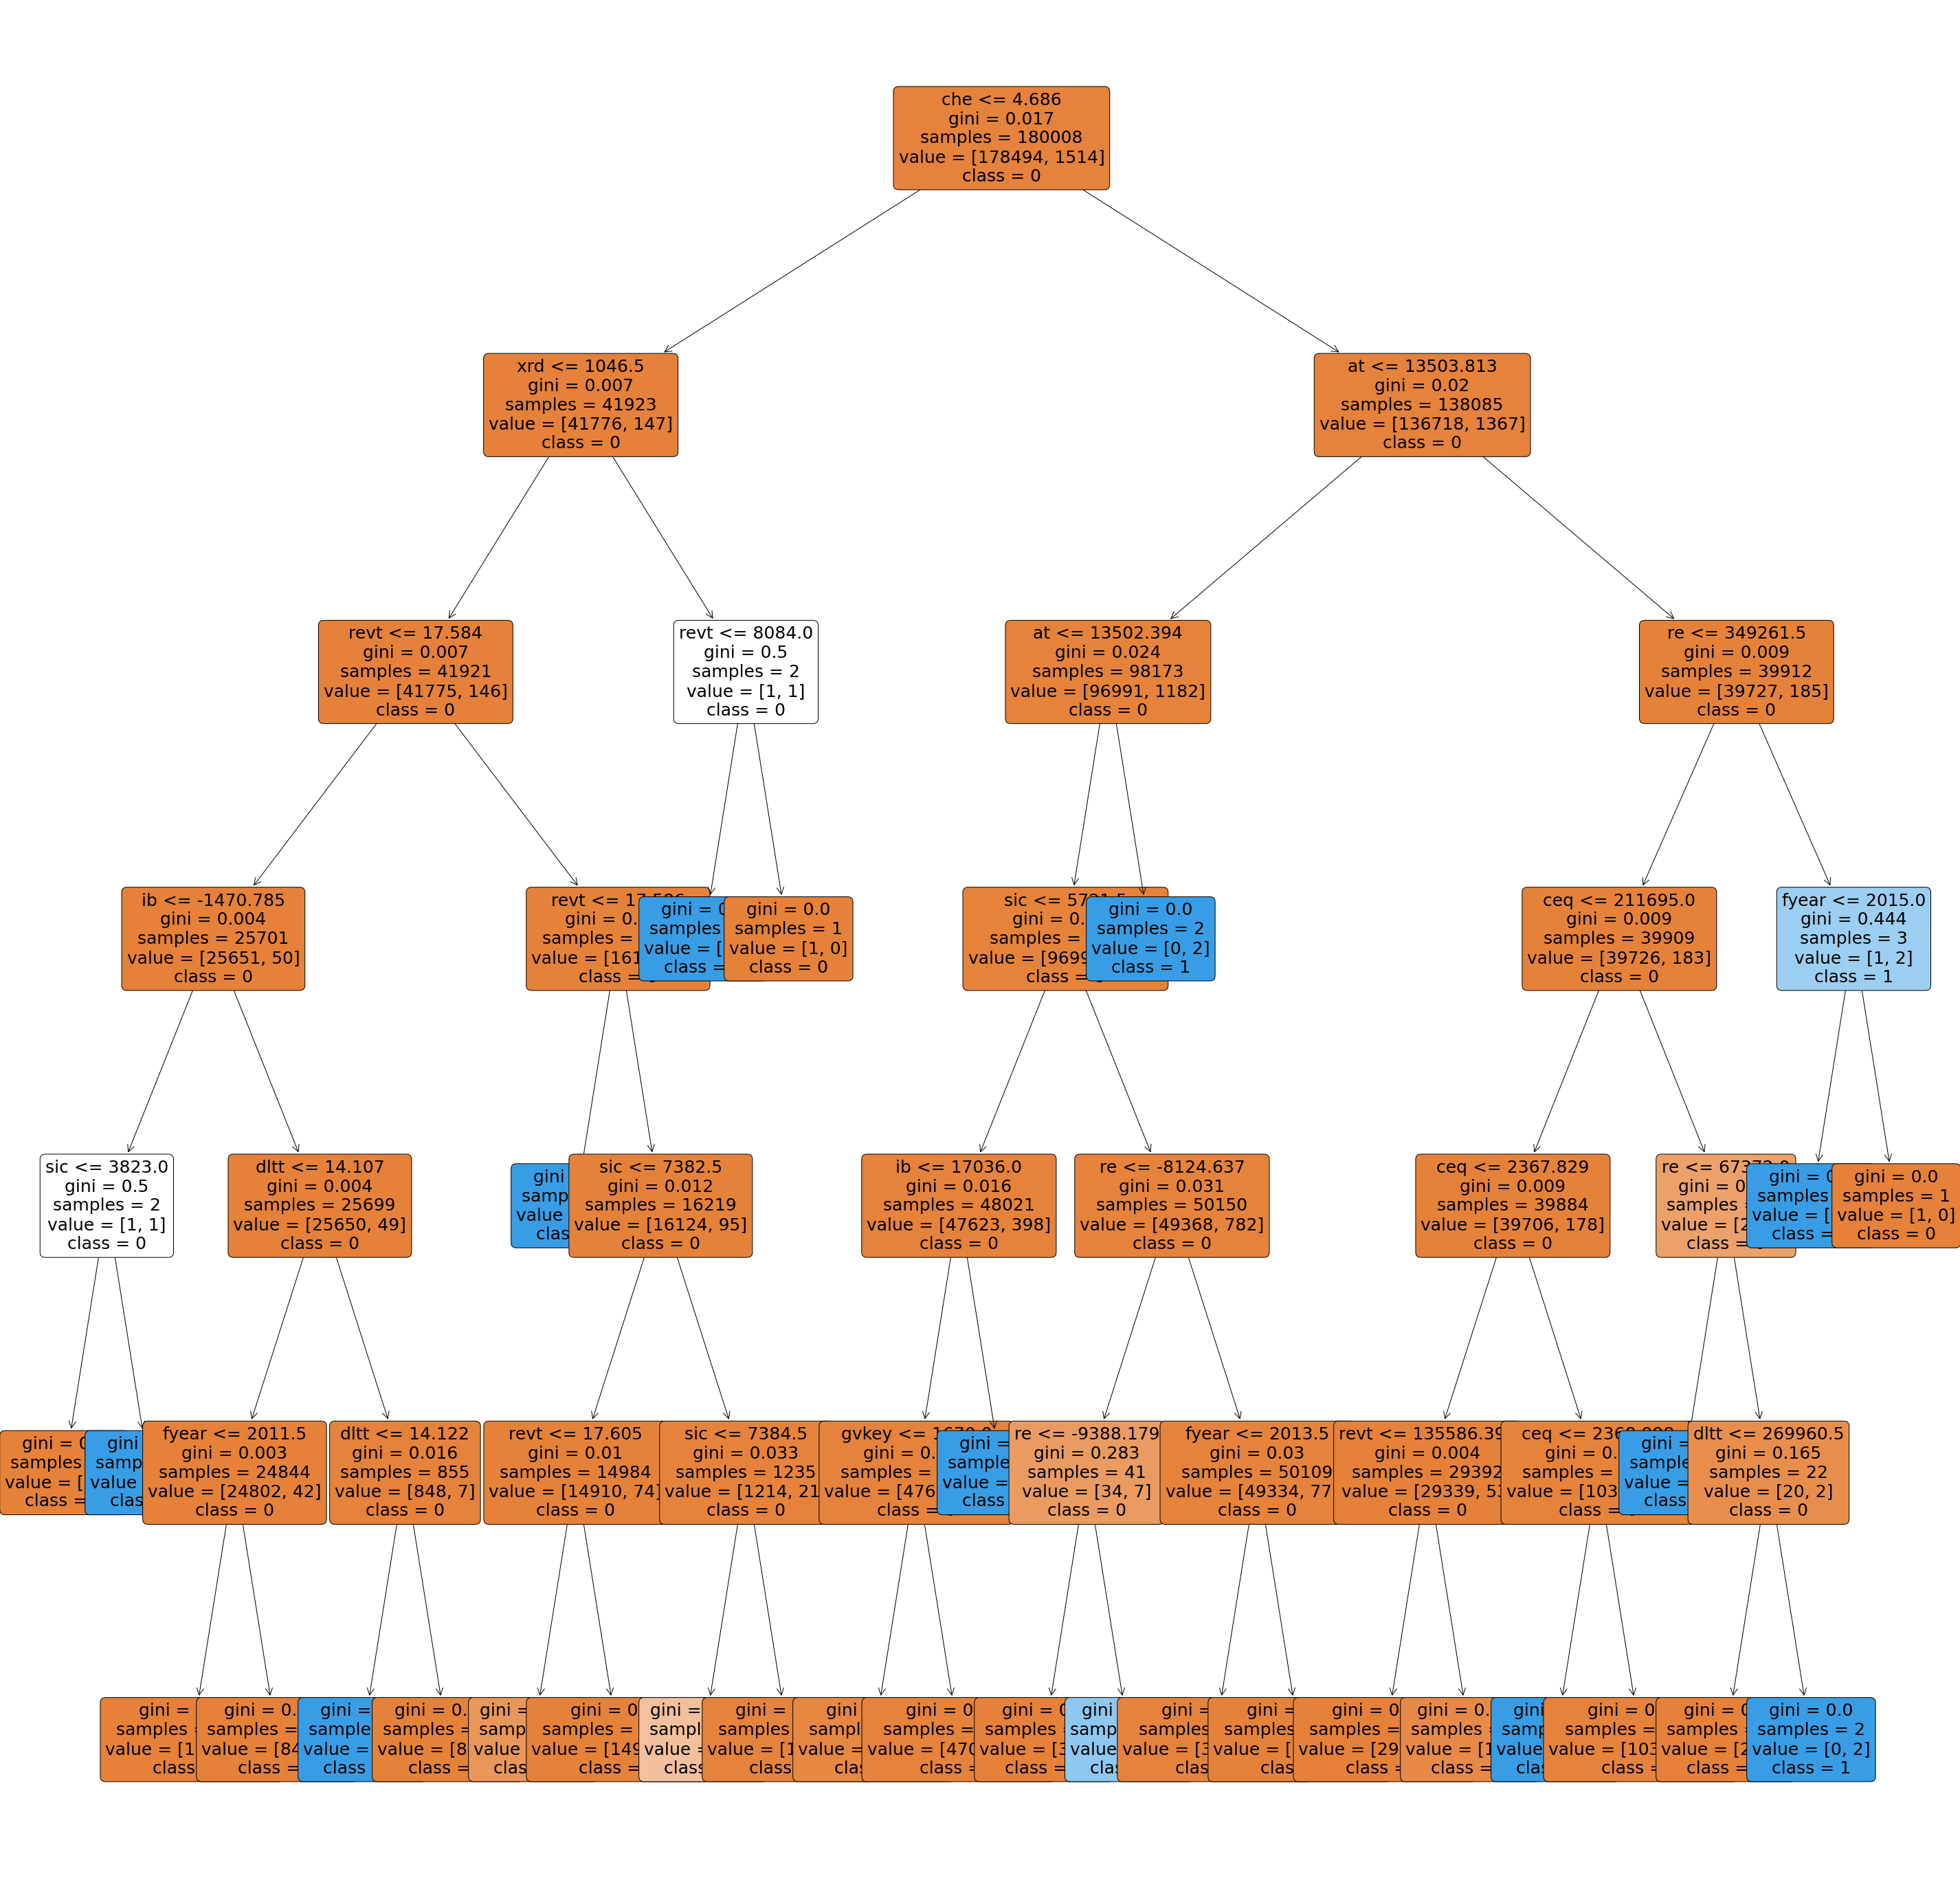

In [269]:
feature_names = list(X.columns)
target_names = list(y.unique())
plt.figure(figsize=(50,50))
tree.plot_tree(clf_en, 
          feature_names = feature_names, 
          class_names = ['0','1'], 
          filled = True,
          rounded = True,
          fontsize=25)
plt.show()

In [270]:
X_test.shape[0]
X_test.shape[1]

16

# LSTM 

In [271]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, LSTM
import tensorflow as tf

In [272]:
X = df.copy()
X=X.drop('target',axis=1)
y=df['target']

In [273]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
y = encoder.fit_transform(y)

In [274]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [235]:
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
scaler = MinMaxScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [278]:
model = Sequential()
#model.add(Dense(128, activation='relu', input_shape=[16,]))
model.add(LSTM(16,input_shape=(16,1),activation='tanh',recurrent_activation='sigmoid'))
model.add(Dense(2, activation='softmax'))
model.add(Dense(2, activation='relu'))
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [279]:
model.fit(x=scaled_X_train, y=y_train, epochs=5, validation_data=(scaled_X_test, y_test))

Epoch 1/5
5626/5626 [==============================] - 79s 13ms/step - loss: 0.6931 - accuracy: 0.9917 - val_loss: 0.6932 - val_accuracy: 0.9919
Epoch 2/5
5626/5626 [==============================] - 62s 11ms/step - loss: 0.6931 - accuracy: 0.9917 - val_loss: 0.6932 - val_accuracy: 0.9919
Epoch 3/5
5626/5626 [==============================] - 63s 11ms/step - loss: 0.6931 - accuracy: 0.9917 - val_loss: 0.6932 - val_accuracy: 0.9919
Epoch 4/5
5626/5626 [==============================] - 60s 11ms/step - loss: 0.6931 - accuracy: 0.9917 - val_loss: 0.6932 - val_accuracy: 0.9919
Epoch 5/5
5626/5626 [==============================] - 63s 11ms/step - loss: 0.6931 - accuracy: 0.9917 - val_loss: 0.6932 - val_accuracy: 0.9919


In [280]:
model.evaluate(scaled_X_test, y_test, verbose=1)

1407/1407 [==============================] - 5s 4ms/step - loss: 0.6932 - accuracy: 0.9919


[0.6931602954864502, 0.9918670058250427]

In [281]:
y_pred=model.predict(scaled_X_test, verbose=1)

1407/1407 [==============================] - 5s 3ms/step


In [283]:
len(y_pred)

45002

In [284]:
y_pred_inv = encoder.inverse_transform(y_pred)

Accuracy: 0.991867028132083
Precision: 0.0
Recall: 0.0
F1: 0.0
AUC 0.5


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


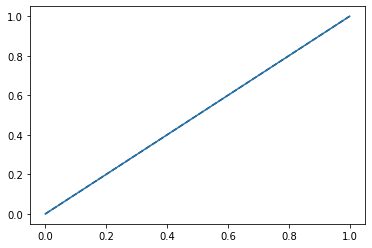

In [285]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_inv))
print("Precision:", metrics.precision_score(y_test, y_pred_inv))
print("Recall:", metrics.recall_score(y_test, y_pred_inv))
print("F1:",metrics.f1_score(y_test, y_pred_inv))
from sklearn.metrics import roc_curve,roc_auc_score
fpr , tpr , thresholds = roc_curve (y_test, y_pred_inv)
auc_keras = metrics.auc(fpr, tpr)
print('AUC',auc_keras)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='RF (area = {:.3f})'.format(auc_keras))
plt.show()

Text(0.5, 15.0, 'Predicted')

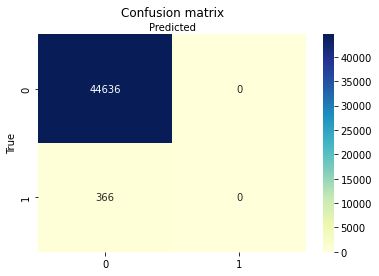

In [287]:
import matplotlib.pyplot as plt
import seaborn as sns
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_inv)

labels = [0.0, 1.0]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

#  Dense Neural Network

In [325]:
from tensorflow import keras
from tensorflow.keras import layers

In [326]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=[16,]))
model.add(Dense(16, activation='tanh', input_shape=[16,]))
model.add(Dense(16, activation='relu', input_shape=[16,]))
model.add(Dense(2, activation='sigmoid'))
loss_fn = keras.losses.SparseCategoricalCrossentropy()
model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])

In [327]:
model.fit(x=scaled_X_train, y=y_train, epochs=3, validation_data=(scaled_X_test, y_test))

Epoch 1/3
5626/5626 [==============================] - 16s 3ms/step - loss: 0.0521 - accuracy: 0.9916 - val_loss: 0.0465 - val_accuracy: 0.9919
Epoch 2/3
5626/5626 [==============================] - 14s 2ms/step - loss: 0.0477 - accuracy: 0.9917 - val_loss: 0.0463 - val_accuracy: 0.9919
Epoch 3/3
5626/5626 [==============================] - 14s 2ms/step - loss: 0.0475 - accuracy: 0.9917 - val_loss: 0.0469 - val_accuracy: 0.9919


In [328]:
model.evaluate(scaled_X_test, y_test, verbose=1)

1407/1407 [==============================] - 3s 2ms/step - loss: 0.0469 - accuracy: 0.9919


[0.04692766070365906, 0.9918670058250427]

In [329]:
y_pred=model.predict(scaled_X_test, verbose=1)

1407/1407 [==============================] - 2s 1ms/step


In [330]:
y_pred_inv = encoder.inverse_transform(y_pred)

Accuracy: 0.991867028132083
Precision: 0.0
Recall: 0.0
AUC 0.5


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


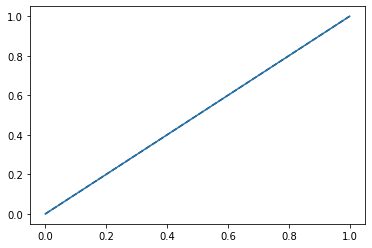

In [333]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_inv))
print("Precision:", metrics.precision_score(y_test, y_pred_inv))
print("Recall:", metrics.recall_score(y_test, y_pred_inv))
from sklearn.metrics import roc_curve,roc_auc_score
fpr , tpr , thresholds = roc_curve(y_test,y_pred_inv)
auc_keras = metrics.auc(fpr, tpr)
print('AUC',auc_keras)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='RF (area = {:.3f})'.format(auc_keras))
plt.show()

Text(0.5, 15.0, 'Predicted')

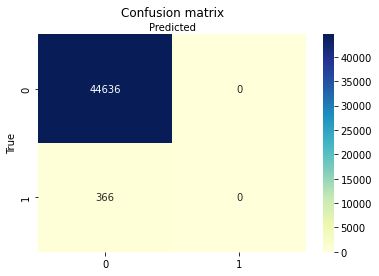

In [334]:
import matplotlib.pyplot as plt
import seaborn as sns
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_inv)

labels = [0.0, 1.0]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

# Recurrent Neural Network